In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pylab as plt

In [2]:
matplotlib.rcParams['figure.figsize'] = 12, 6

In [3]:
df = pd.read_json("results/data-2019-08-22c.json").rename({'name': 'action'}, axis=1)

In [4]:
df.sample(n=10, random_state=42)

,db,duration,env,i,ms,action,qps
10585,mysql,228525,docker,1509.0,4531.531532,update,333
239079,postgres,1071031403,docker,13333.0,1333.300000,update,10000
145737,postgres,15595853426,docker,19993.0,1999.300000,create,10000
298839,postgres,27745821916,docker,23092.0,2309.200000,delete,10000
120561,postgres,6597526118,docker,11483.0,3445.244524,delete,3333
68031,postgres,7307040645,docker,8951.0,2685.568557,create,3333
262582,postgres,978816356,docker,36836.0,3683.600000,update,10000
34555,mysql,1594169478,docker,480.0,480.000000,delete,1000
97327,postgres,25972479,docker,4915.0,1474.647465,update,3333
65254,postgres,7001636525,docker,6174.0,1852.385239,create,3333


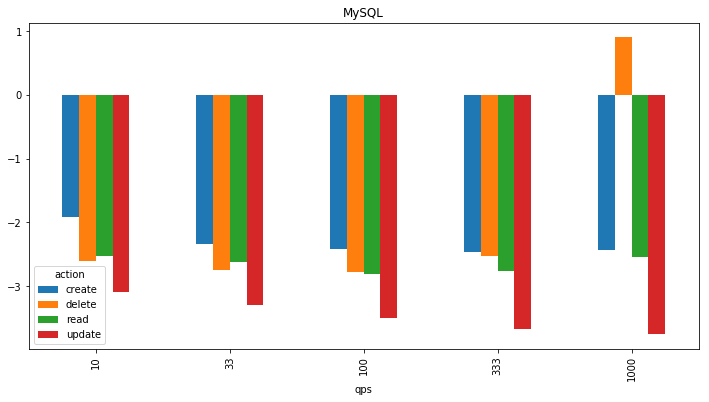

In [5]:
conditions = (
    ~df['action'].str.contains('Map') \
        & (df['ms'] >= 1000) \
        & (df['ms'] <= 4000)
        & (df['db'] == 'mysql')
)

data = df[conditions].groupby(['action', 'qps'])['duration'].mean().unstack().T
data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title='MySQL')

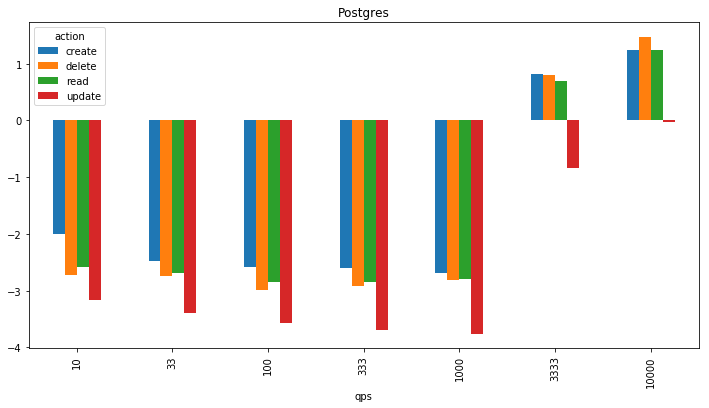

In [6]:
conditions = (
    ~df['action'].str.contains('Map') \
        & (df['ms'] >= 1000) \
        & (df['ms'] <= 4000)
        & (df['db'] == 'postgres')
)

data = df[conditions].groupby(['action', 'qps'])['duration'].mean().unstack().T
data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title='Postgres')

create takes 45.24% longer on MySQL
read takes 27.74% longer on MySQL
update takes 13.84% longer on MySQL
delete takes 30.99% longer on MySQL


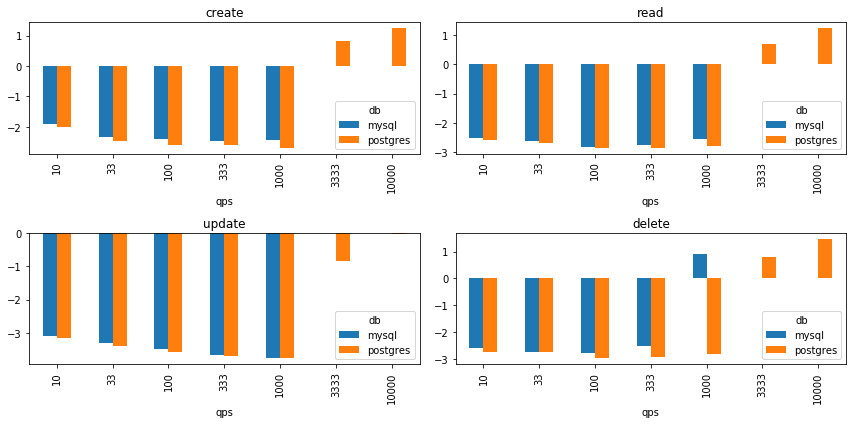

In [7]:
_, _axes = plt.subplots(2, 2)
axes = [a for ax in _axes for a in ax]

for action, ax in zip(['create', 'read', 'update', 'delete'], axes):
    conditions = (
            (df['ms'] >= 1000)
            & (df['ms'] <= 4000)
            & (df['action'] == action)
    )

    data = df[conditions].groupby(['db', 'qps'])['duration'].mean().unstack().T
    data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title=action, ax=ax)
    
    data = data
    ratio = (data['mysql'] / data['postgres'])
    ratio[ratio > 2.0] = np.nan
    print "{} takes {:.2%} longer on MySQL".format(action, ratio.mean() - 1)
    
plt.tight_layout()

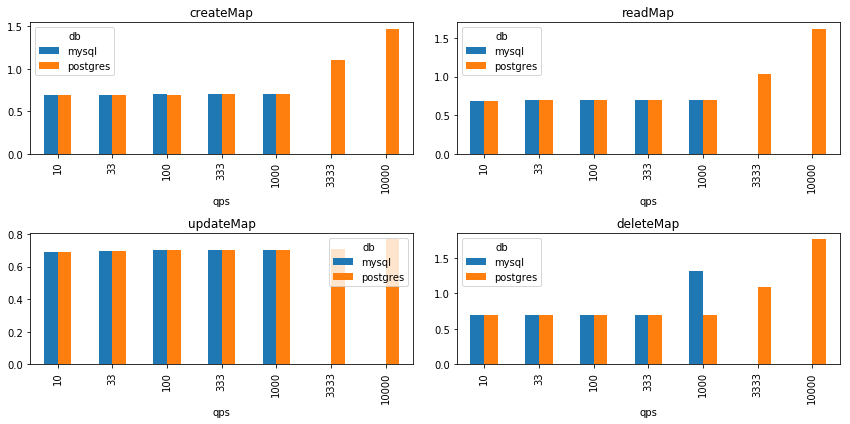

In [8]:
_, _axes = plt.subplots(2, 2)
axes = [a for ax in _axes for a in ax]

for action, ax in zip(['createMap', 'readMap', 'updateMap', 'deleteMap'], axes):
    data = df[df['action'] == action].groupby(['db', 'qps'])['duration'].mean().unstack().T

    data.apply(np.log10).apply(lambda x: x - 9.).plot.bar(title=action, ax=ax)
    
plt.tight_layout()